# stl10-embedding dataset 

In [1]:
# Imports
import os
import sys
BASE_DIR = os.path.dirname(os.getcwd())
sys.path.append(BASE_DIR)
import torch
import numpy as np
import pandas as pd

# Opendataval
from dataval.dataloader import Register, DataFetcher, mix_labels, add_gauss_noise
from dataval.datavaluation import NDDV, NDSV
from dataval.experiment import ExperimentMediator

import warnings
warnings.filterwarnings("ignore")

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
DataFetcher.datasets_available()

{'2dplanes',
 'MiniBooNE',
 'adult',
 'bbc',
 'bbc-embeddings',
 'breast_cancer',
 'challenge-iris',
 'cifar10',
 'cifar10-embeddings',
 'cifar100',
 'cifar100-embeddings',
 'creditcard',
 'diabetes',
 'digits',
 'echoMonths',
 'election',
 'electricity',
 'fashion',
 'fmnist-embeddings',
 'fried',
 'gaussian_classifier',
 'gaussian_classifier_high_dim',
 'imdb',
 'imdb-embeddings',
 'iris',
 'linnerud',
 'lowbwt',
 'mnist',
 'mnist-embeddings',
 'mv',
 'nomao',
 'pol',
 'stl10-embeddings',
 'stock',
 'svhn-embeddings',
 'vehicle_sensIT',
 'wave_energy',
 'webdata_wXa'}

## [Step 1] Set up an environment
`ExperimentMediator` is a fundamental concept in establishing the `opendataval` environment. It empowers users to configure hyperparameters, including a dataset, a type of synthetic noise, and a prediction model. With  `ExperimentMediator`, users can effortlessly compute various data valuation algorithms.

The following code cell demonstrates how to set up `ExperimentMediator` with a pre-registered dataset and a prediction model.
- Dataset: adult
- Model: sklearn's logistic regression model
- Metric: Classification accuracy

In [3]:
dataset_name = "stl10-embeddings"
train_count, valid_count, test_count, meta_count = 1000, 100, 300, 100
# train_count, valid_count, test_count, meta_count = 0.7, 0.05, 0.2, 0.05
noise_rate = 0.2
noise_kwargs = {'noise_rate': noise_rate}
max_epoch = 3
batch_size = 32
lr = 0.01
random_state = 42
train_kwargs = {"epochs": max_epoch, "batch_size": batch_size, "lr": lr}
# model_name = "classifiermlp"   # "sklogreg"
model_name = "LogisticRegression"
metric_name = "accuracy"
cache_dir = "../data_files/"
add_noise = add_gauss_noise
noise_type = "gauss_noise"
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir=cache_dir,  
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    meta_count=meta_count,
    add_noise=add_noise, 
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    random_state = random_state,
    model_name=model_name,
    metric_name=metric_name,
    device=device
)

40it [04:09,  6.25s/it]


Base line model metric_name='accuracy': perf=0.1666666716337204


A full list of registered datasets can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/dataloader/fetcher.py#L121). A list of available  prediction models can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/model/__init__.py#L111).

## [Step 2] Compute data values
`opendataval` provides various state-of-the-art data valuation algorithms. `ExperimentMediator.compute_data_values()` computes data values.

In [4]:
data_evaluators = [NDSV(mfg_epochs=50, base_model=model_name, meta_interval=5, Ntime=3, batch_size=batch_size, weight_decay=5e-4, meta_weight_decay=1e-4, meta_hidden_size=10)]

In [5]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:01<00:50,  1.04s/it]

Epoch: 0, Test Accuracy: 9.67%


  4%|▍         | 2/50 [00:02<00:48,  1.00s/it]

Epoch: 1, Test Accuracy: 13.00%


  6%|▌         | 3/50 [00:02<00:45,  1.03it/s]

Epoch: 2, Test Accuracy: 20.33%


  8%|▊         | 4/50 [00:03<00:40,  1.15it/s]

Epoch: 3, Test Accuracy: 20.00%


 10%|█         | 5/50 [00:04<00:35,  1.27it/s]

Epoch: 4, Test Accuracy: 23.33%


 12%|█▏        | 6/50 [00:04<00:32,  1.35it/s]

Epoch: 5, Test Accuracy: 16.00%


 14%|█▍        | 7/50 [00:05<00:31,  1.38it/s]

Epoch: 6, Test Accuracy: 22.67%


 16%|█▌        | 8/50 [00:06<00:29,  1.40it/s]

Epoch: 7, Test Accuracy: 23.33%


 18%|█▊        | 9/50 [00:07<00:29,  1.41it/s]

Epoch: 8, Test Accuracy: 26.67%


 20%|██        | 10/50 [00:07<00:28,  1.39it/s]

Epoch: 9, Test Accuracy: 34.00%


 22%|██▏       | 11/50 [00:08<00:27,  1.42it/s]

Epoch: 10, Test Accuracy: 25.67%


 24%|██▍       | 12/50 [00:09<00:26,  1.45it/s]

Epoch: 11, Test Accuracy: 13.33%


 26%|██▌       | 13/50 [00:09<00:25,  1.42it/s]

Epoch: 12, Test Accuracy: 18.67%


 28%|██▊       | 14/50 [00:10<00:25,  1.43it/s]

Epoch: 13, Test Accuracy: 18.67%


 30%|███       | 15/50 [00:11<00:24,  1.42it/s]

Epoch: 14, Test Accuracy: 27.00%


 32%|███▏      | 16/50 [00:11<00:24,  1.40it/s]

Epoch: 15, Test Accuracy: 25.67%


 34%|███▍      | 17/50 [00:12<00:23,  1.41it/s]

Epoch: 16, Test Accuracy: 21.33%


 36%|███▌      | 18/50 [00:13<00:22,  1.44it/s]

Epoch: 17, Test Accuracy: 22.33%


 38%|███▊      | 19/50 [00:14<00:21,  1.45it/s]

Epoch: 18, Test Accuracy: 30.00%


 40%|████      | 20/50 [00:14<00:20,  1.46it/s]

Epoch: 19, Test Accuracy: 34.33%


 42%|████▏     | 21/50 [00:15<00:20,  1.45it/s]

Epoch: 20, Test Accuracy: 26.67%


 44%|████▍     | 22/50 [00:16<00:19,  1.46it/s]

Epoch: 21, Test Accuracy: 26.33%


 46%|████▌     | 23/50 [00:16<00:19,  1.41it/s]

Epoch: 22, Test Accuracy: 32.00%


 48%|████▊     | 24/50 [00:17<00:18,  1.42it/s]

Epoch: 23, Test Accuracy: 35.67%


 50%|█████     | 25/50 [00:18<00:17,  1.43it/s]

Epoch: 24, Test Accuracy: 36.67%


 52%|█████▏    | 26/50 [00:18<00:16,  1.46it/s]

Epoch: 25, Test Accuracy: 34.67%


 54%|█████▍    | 27/50 [00:19<00:15,  1.45it/s]

Epoch: 26, Test Accuracy: 29.33%


 56%|█████▌    | 28/50 [00:20<00:15,  1.44it/s]

Epoch: 27, Test Accuracy: 28.00%


 58%|█████▊    | 29/50 [00:21<00:15,  1.38it/s]

Epoch: 28, Test Accuracy: 28.00%


 60%|██████    | 30/50 [00:21<00:14,  1.39it/s]

Epoch: 29, Test Accuracy: 33.67%


 62%|██████▏   | 31/50 [00:22<00:13,  1.41it/s]

Epoch: 30, Test Accuracy: 32.33%


 64%|██████▍   | 32/50 [00:23<00:12,  1.44it/s]

Epoch: 31, Test Accuracy: 32.00%


 66%|██████▌   | 33/50 [00:23<00:11,  1.42it/s]

Epoch: 32, Test Accuracy: 30.67%


 68%|██████▊   | 34/50 [00:24<00:11,  1.40it/s]

Epoch: 33, Test Accuracy: 32.00%


 70%|███████   | 35/50 [00:25<00:10,  1.41it/s]

Epoch: 34, Test Accuracy: 31.00%


 72%|███████▏  | 36/50 [00:26<00:10,  1.38it/s]

Epoch: 35, Test Accuracy: 32.67%


 74%|███████▍  | 37/50 [00:26<00:09,  1.38it/s]

Epoch: 36, Test Accuracy: 32.00%


 76%|███████▌  | 38/50 [00:27<00:08,  1.41it/s]

Epoch: 37, Test Accuracy: 32.33%


 78%|███████▊  | 39/50 [00:28<00:07,  1.41it/s]

Epoch: 38, Test Accuracy: 31.00%


 80%|████████  | 40/50 [00:28<00:07,  1.42it/s]

Epoch: 39, Test Accuracy: 29.00%


 82%|████████▏ | 41/50 [00:29<00:06,  1.42it/s]

Epoch: 40, Test Accuracy: 29.33%


 84%|████████▍ | 42/50 [00:30<00:05,  1.39it/s]

Epoch: 41, Test Accuracy: 31.00%


 86%|████████▌ | 43/50 [00:31<00:05,  1.37it/s]

Epoch: 42, Test Accuracy: 30.67%


 88%|████████▊ | 44/50 [00:31<00:04,  1.39it/s]

Epoch: 43, Test Accuracy: 32.67%


 90%|█████████ | 45/50 [00:32<00:03,  1.40it/s]

Epoch: 44, Test Accuracy: 32.00%


 92%|█████████▏| 46/50 [00:33<00:02,  1.42it/s]

Epoch: 45, Test Accuracy: 31.00%


 94%|█████████▍| 47/50 [00:33<00:02,  1.40it/s]

Epoch: 46, Test Accuracy: 31.00%


 96%|█████████▌| 48/50 [00:34<00:01,  1.41it/s]

Epoch: 47, Test Accuracy: 31.33%


 98%|█████████▊| 49/50 [00:35<00:00,  1.37it/s]

Epoch: 48, Test Accuracy: 30.67%


100%|██████████| 50/50 [00:36<00:00,  1.39it/s]

Epoch: 49, Test Accuracy: 30.67%
Elapsed time NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10): 0:00:36.218604
CPU times: total: 4min 3s
Wall time: 36.2 s


## [Step 3] Evaluate data values

In [6]:
from dataval.experiment.exper_methods import (
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    remove_high_value,
    remove_low_value,
    add_low_high,
    add_high_value,
    add_low_value,
    save_dataval
)
from matplotlib import pyplot as plt

In [7]:
# Saving the results with percent 5%
percent = 0.05
output_dir = f"../results/NDDV_{device}_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_cpu_stl10-embeddings_LogisticRegression_gauss_noise_noise_rate=0.2_train_count=1000_percent=0.05/'

### Noisy data detection 
- `noisy_detection` performs the noisy data detection task and evaluates the F1-score of each data valuation algorithm's prediction. The higher, the better.  
  - noisy data: mislabeled data

In [8]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.795322


### Discover noisy samples
- `discover_corrupted_sample` visualizes how well noisy data points are identified when a fraction of dataset is inspected. 

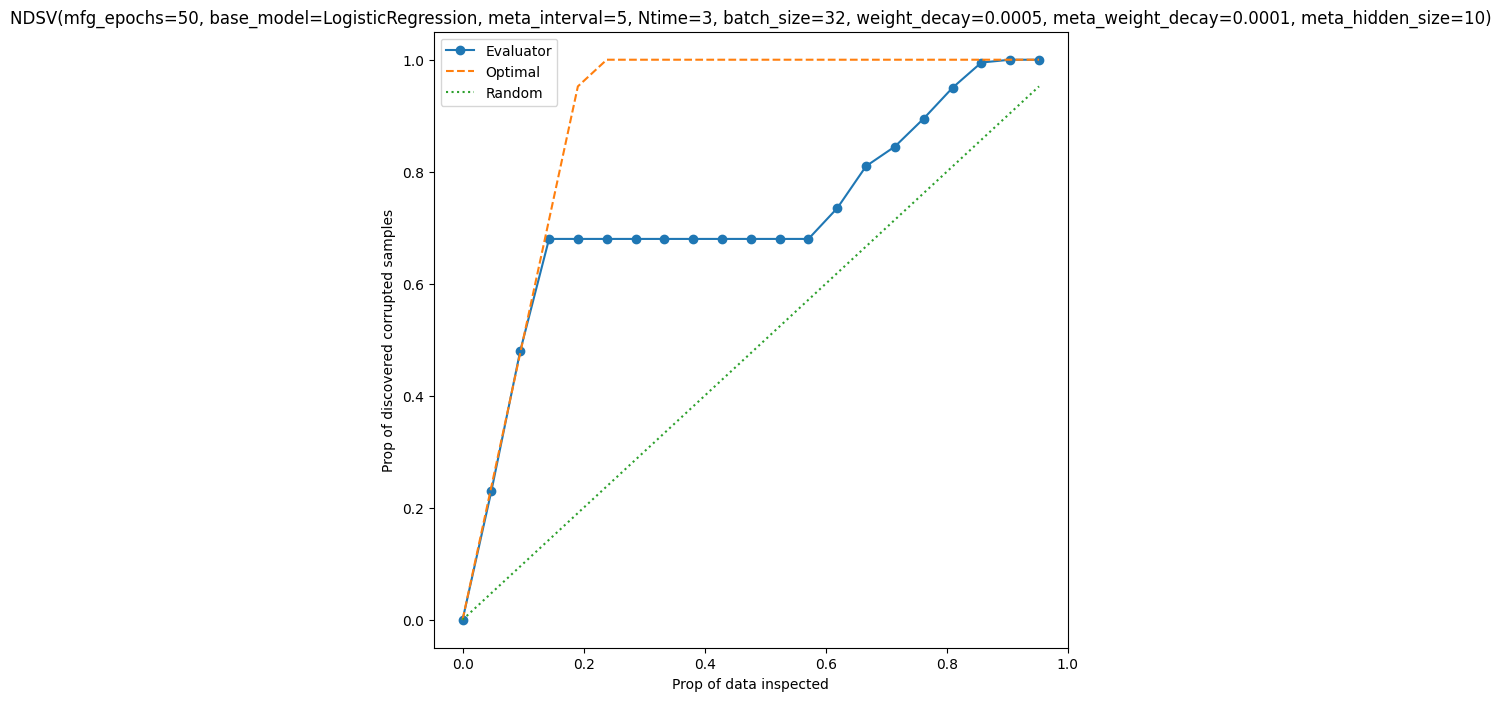

In [9]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

### Point removal experiment
- `remove_high_low` performs the point removal experiment. Each data valution algorithm, it provides two curves: one is removing data in a descending order (orange), the other is in an ascending order (blue). As for the orange (resp. blue) curve, the lower (resp. upper), the better. 

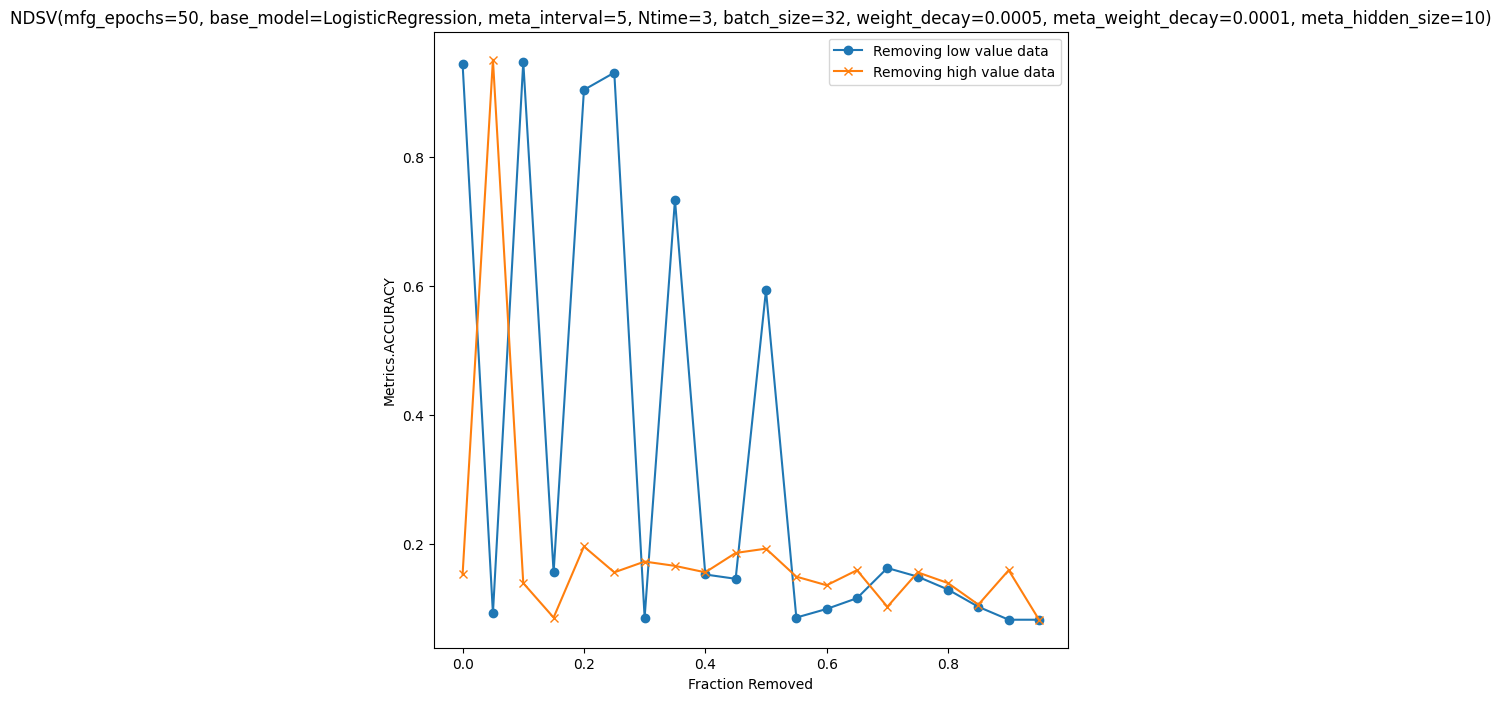

In [10]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

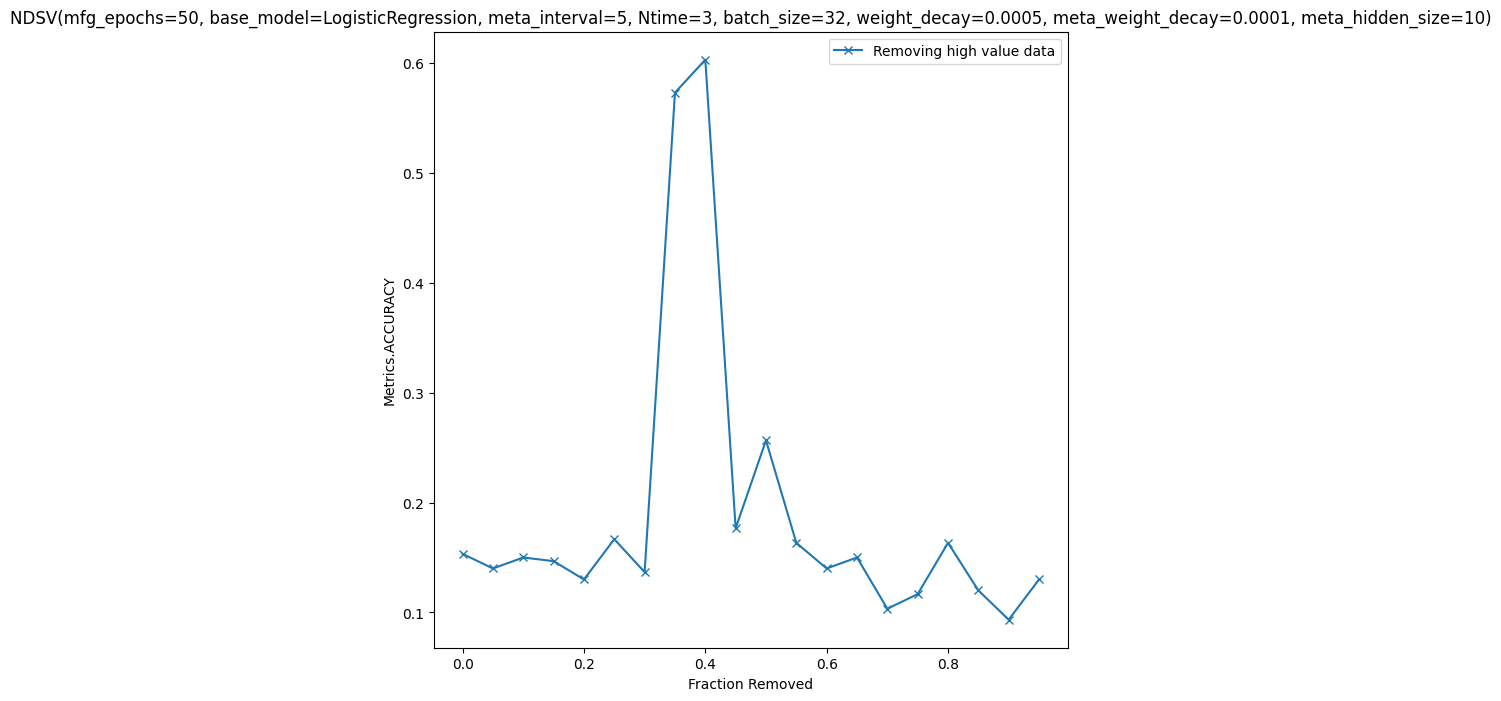

In [11]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

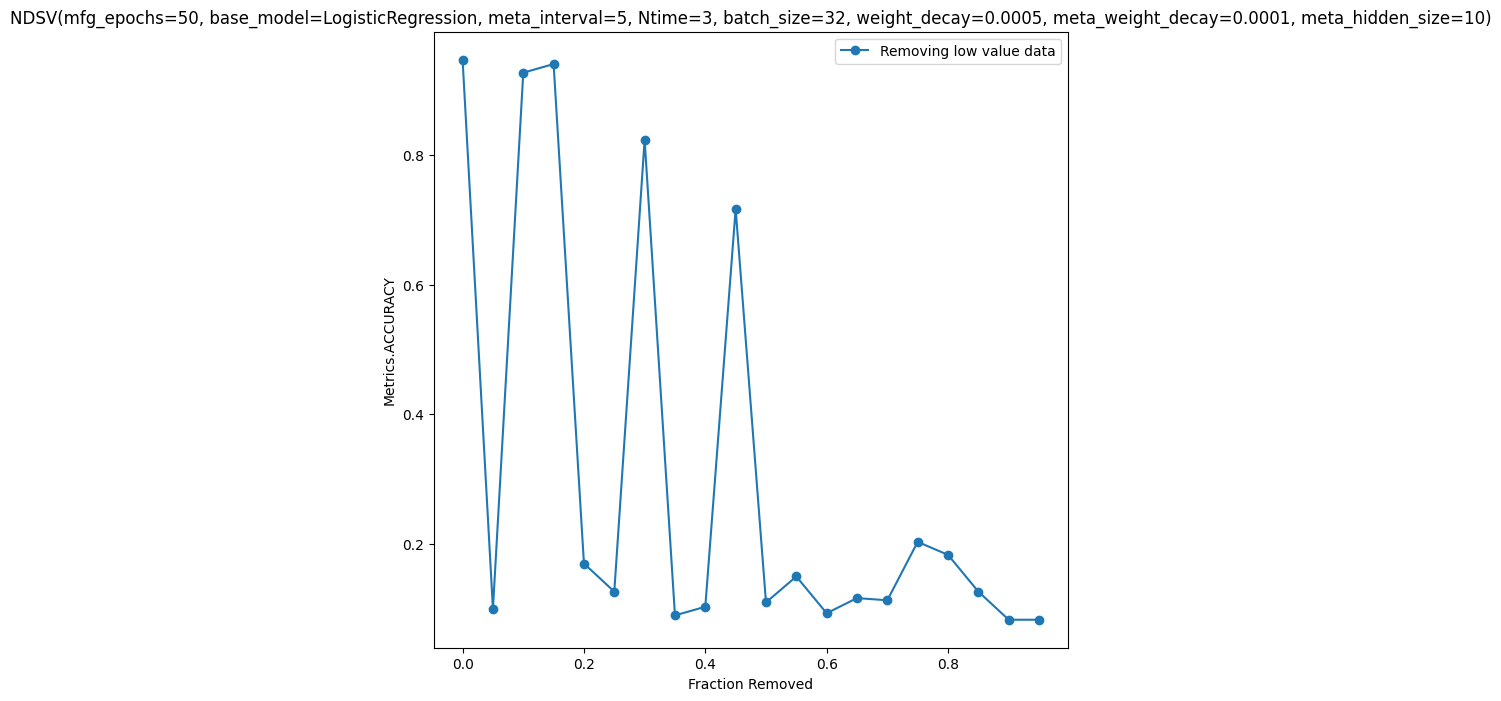

In [12]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

In [13]:
df_resp # it provides complete information for generating point-removal experiment figures.

,remove_least_influential_first_Metrics.ACCURACY,remove_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.943333,0.153333,0.0
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.093333,0.95,0.05
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.946667,0.14,0.1
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.156667,0.086667,0.15
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.903333,0.196667,0.2
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.93,0.156667,0.25
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.086667,0.173333,0.3
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.733333,0.166667,0.35
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.153333,0.156667,0.4
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.146667,0.186667,0.45


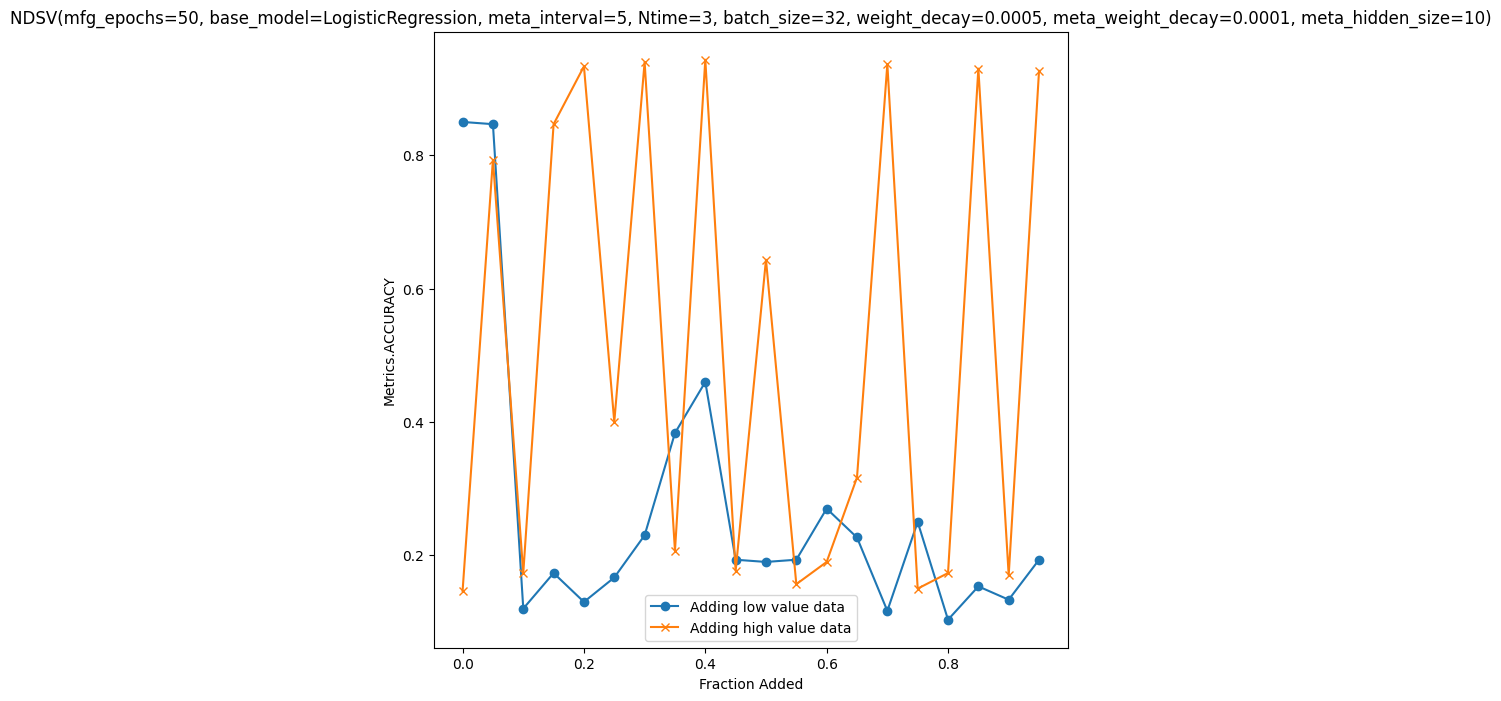

In [14]:
fig = plt.figure(figsize=(18, 8))
df_addp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

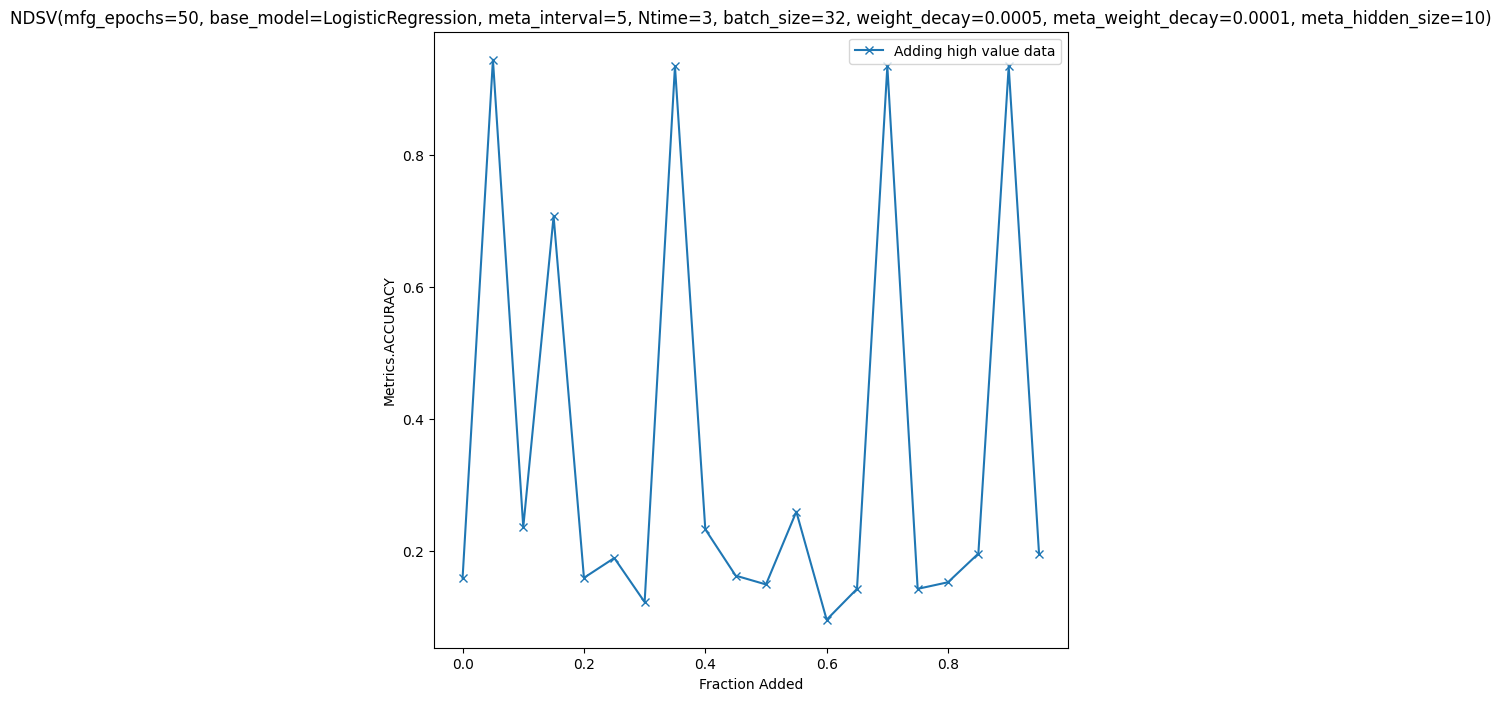

In [15]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

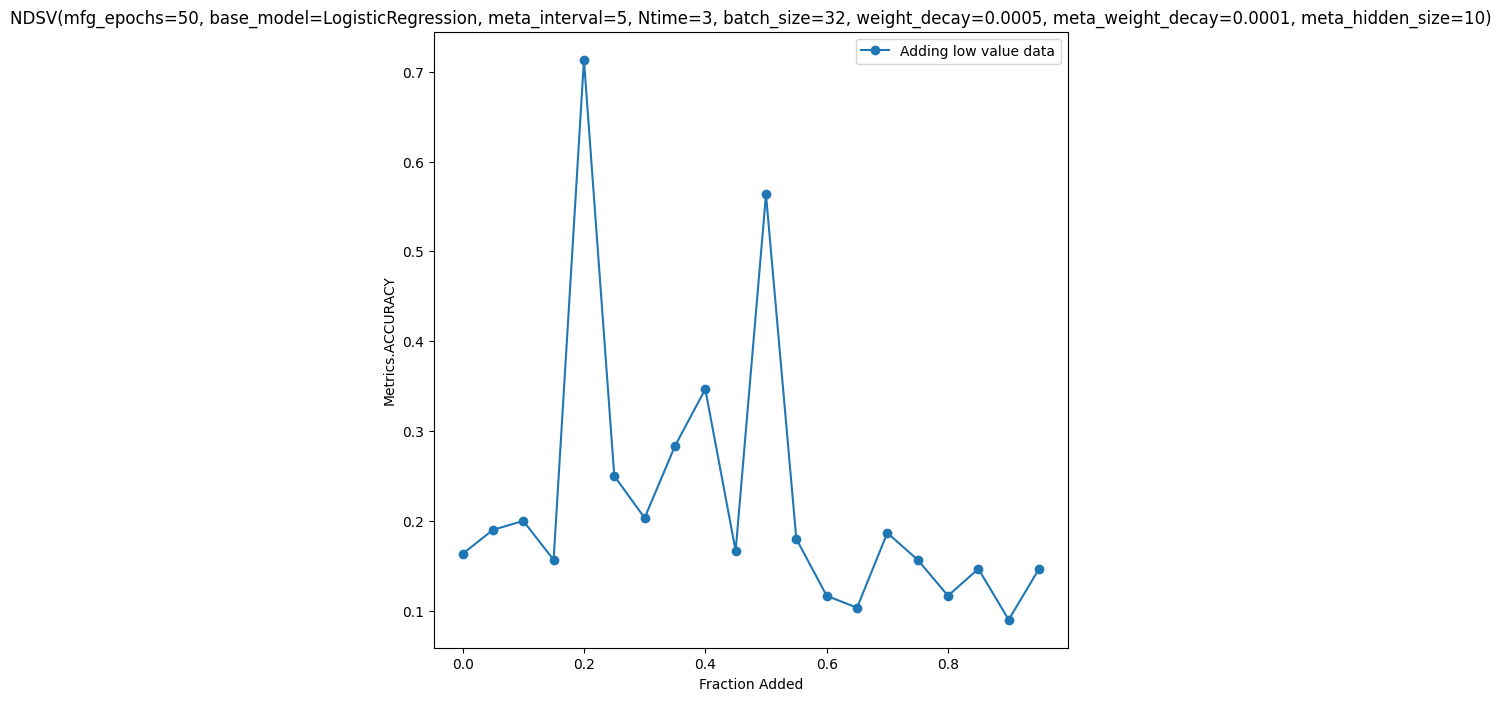

In [16]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)

In [17]:
df_addp

,add_least_influential_first_Metrics.ACCURACY,add_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.193333,0.926667,0.95
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.133333,0.17,0.9
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.153333,0.93,0.85
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.103333,0.173333,0.8
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.25,0.15,0.75
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.116667,0.936667,0.7
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.226667,0.316667,0.65
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.27,0.19,0.6
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.193333,0.156667,0.55
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.19,0.643333,0.5


### Save data values
- `save_dataval` stores computed data values at `{output_dir}/save_dataval.csv`.

In [18]:
exper_med.evaluate(save_dataval, save_output=True)

,indices,data_values
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",4657,0.000501
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",3539,0.000501
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",907,-0.002627
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",4353,0.000169
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",3745,0.000501
...,...,...
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",3589,0.008666
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",679,0.004836
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",3999,0.004836
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",2706,-0.007677


### percent is 0.1

In [19]:
# Saving the results with percent 10%
percent = 0.1
output_dir = f"../results/NDDV_{device}_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_cpu_stl10-embeddings_LogisticRegression_gauss_noise_noise_rate=0.2_train_count=1000_percent=0.1/'

In [20]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
"NDSV(mfg_epochs=50, base_model=LogisticRegression, meta_interval=5, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=10)",0.795322


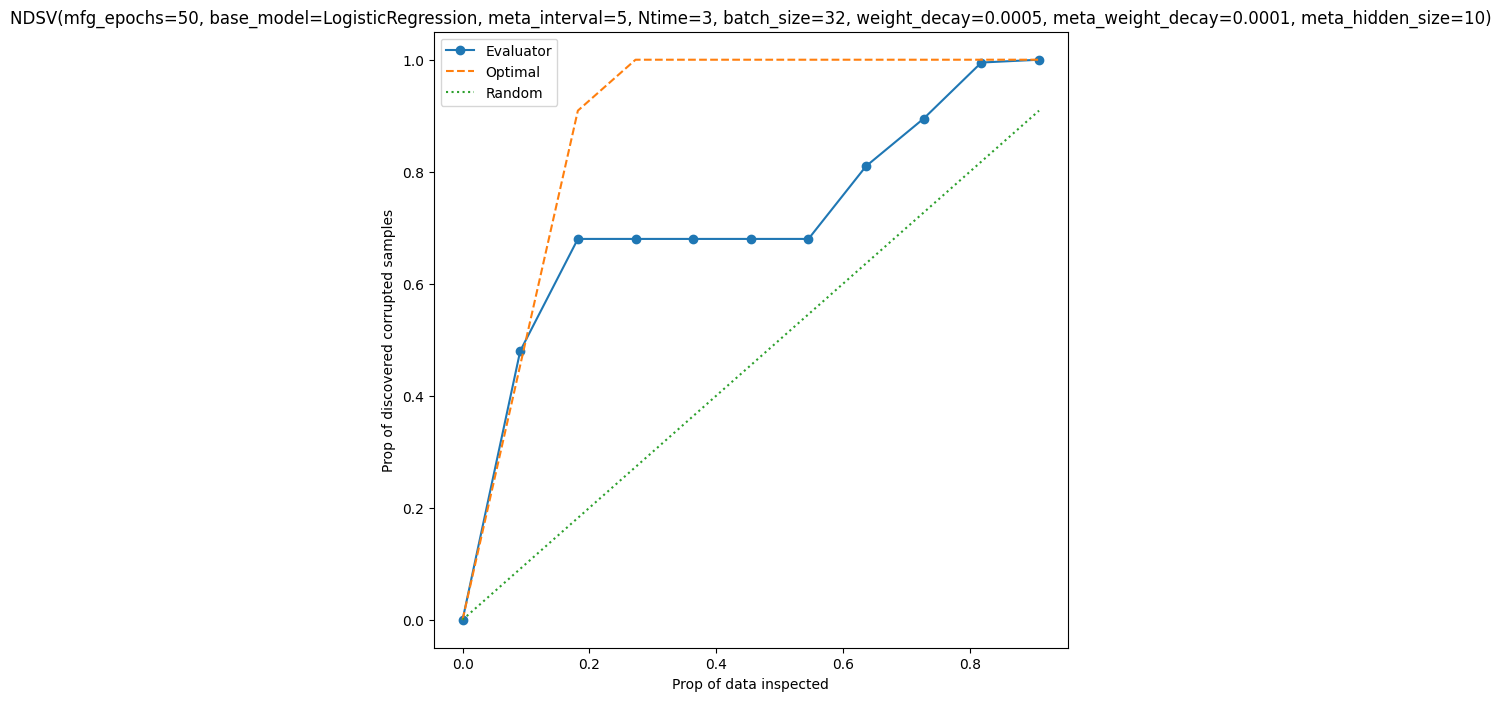

In [21]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

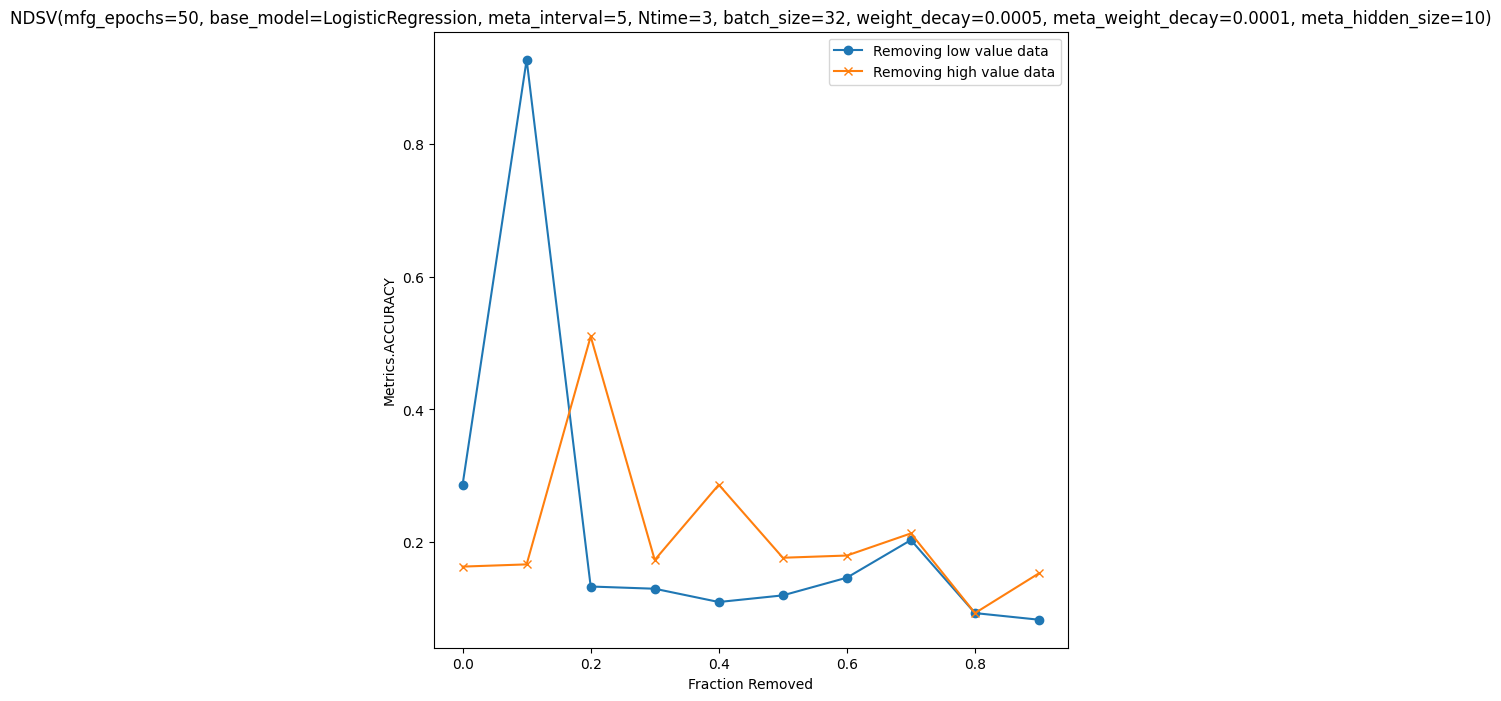

In [22]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

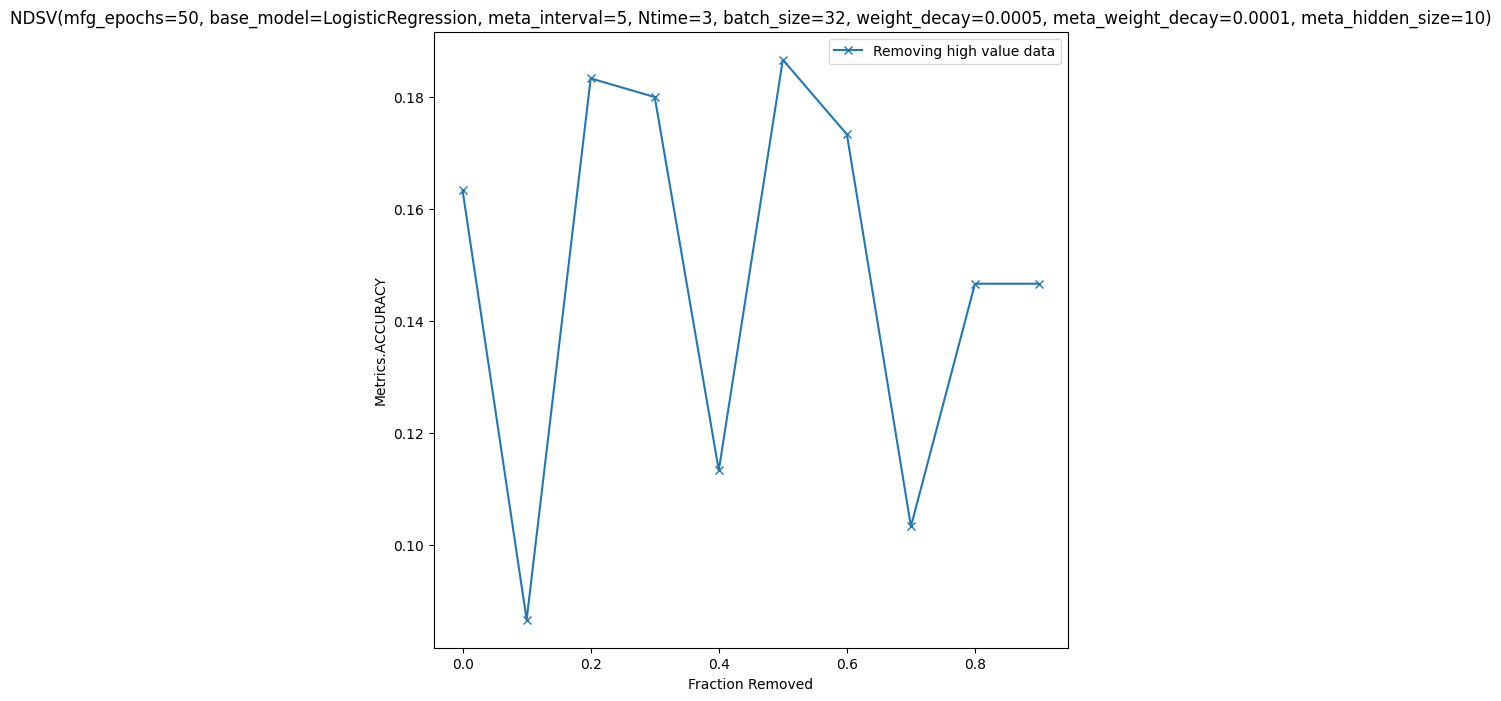

In [23]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_high_value, fig, col=2, percnet=percent, save_output=True)

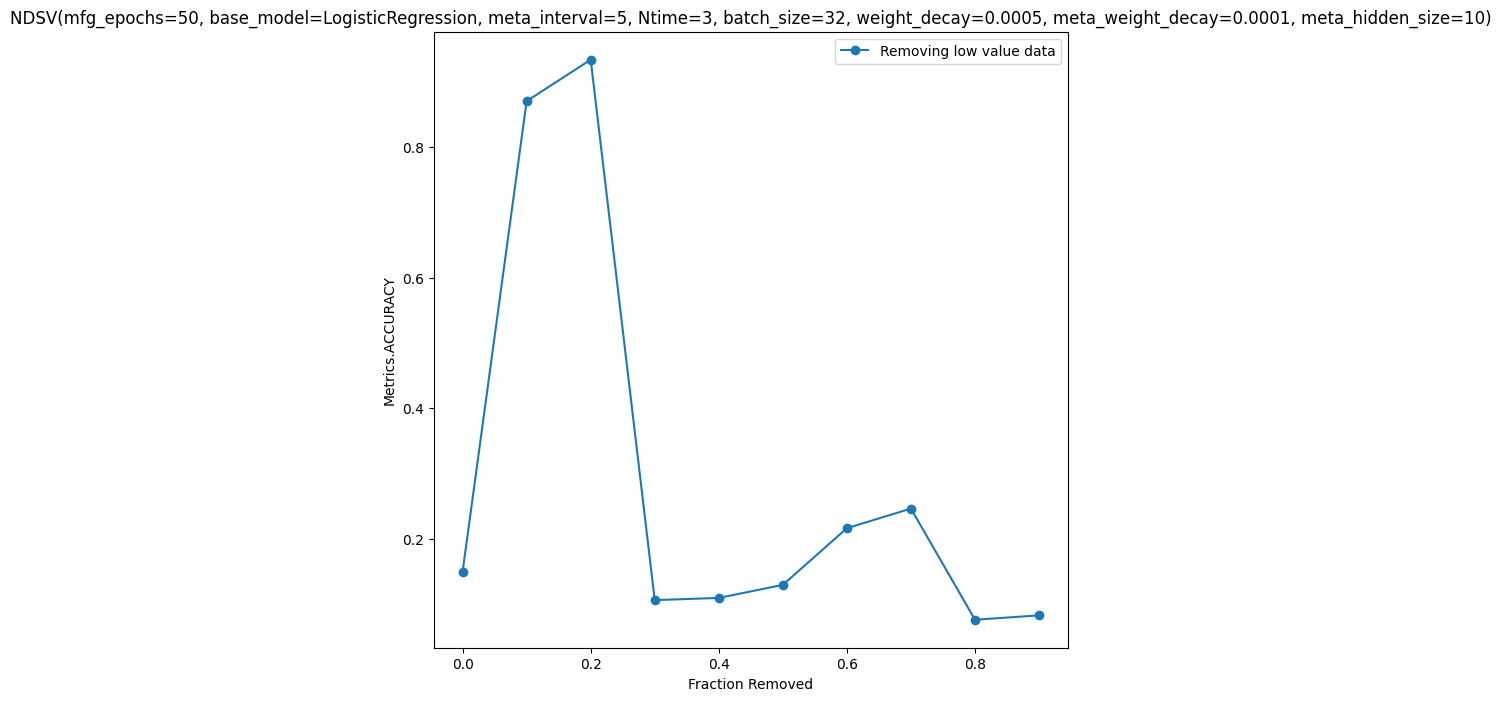

In [24]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(remove_low_value, fig, col=2, percnet=percent, save_output=True)

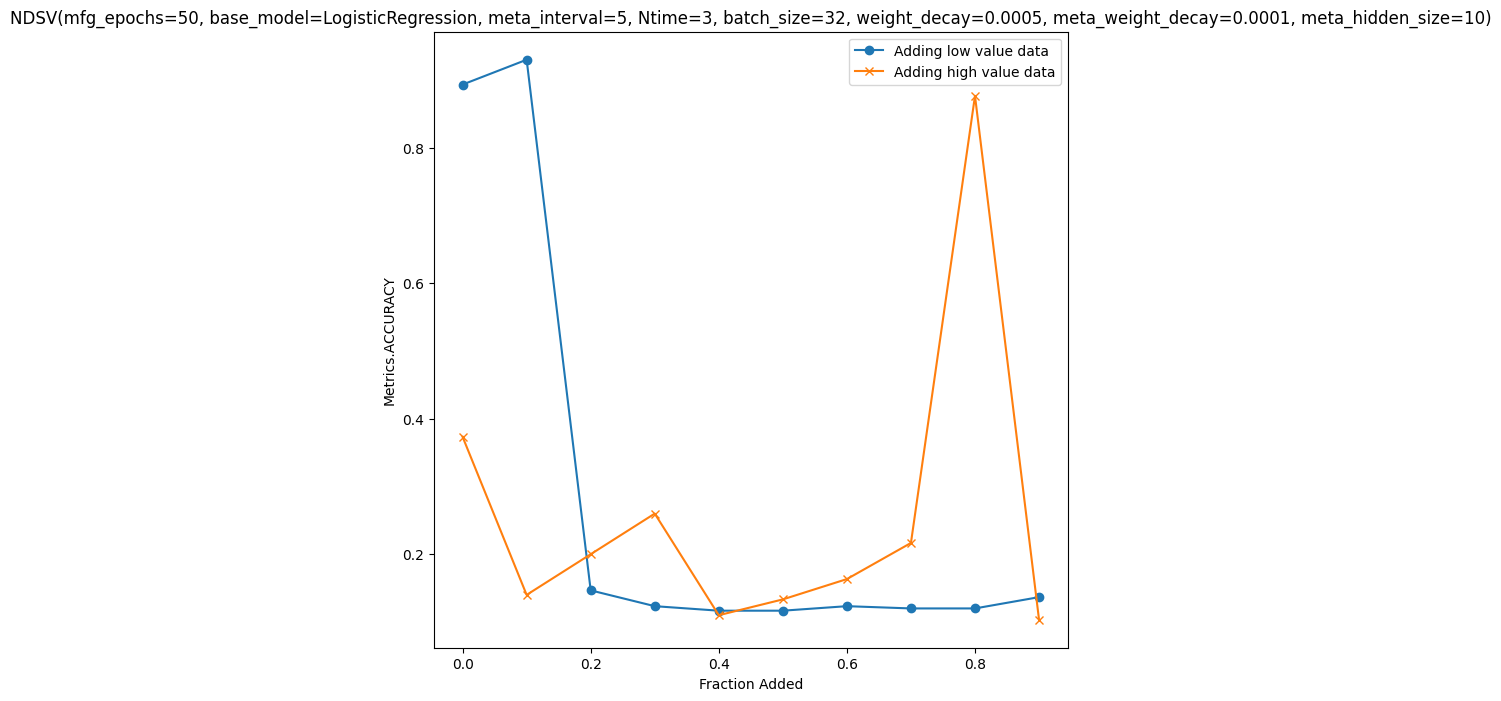

In [25]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(add_low_high, fig, col=2, percnet=percent, save_output=True)

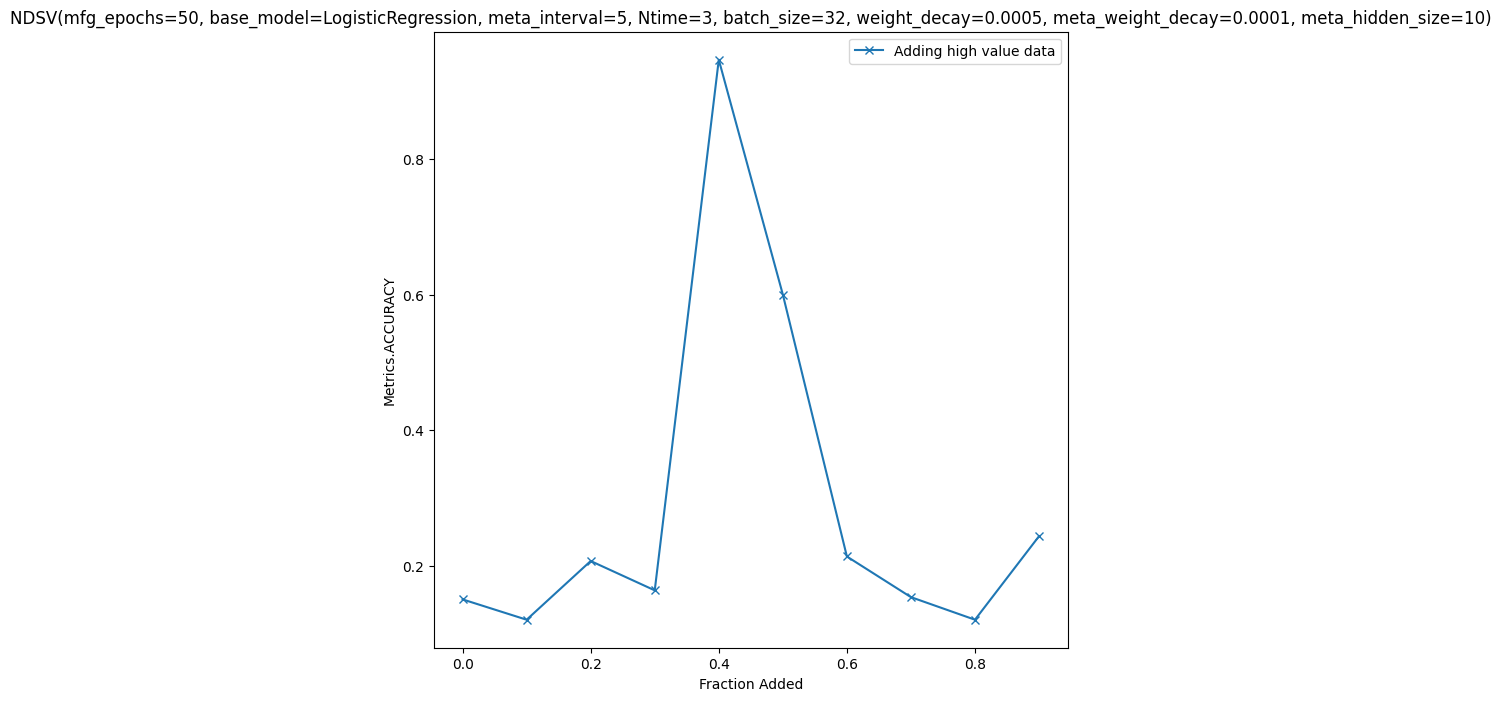

In [26]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_high_value, fig, col=2, percnet=percent, save_output=True)

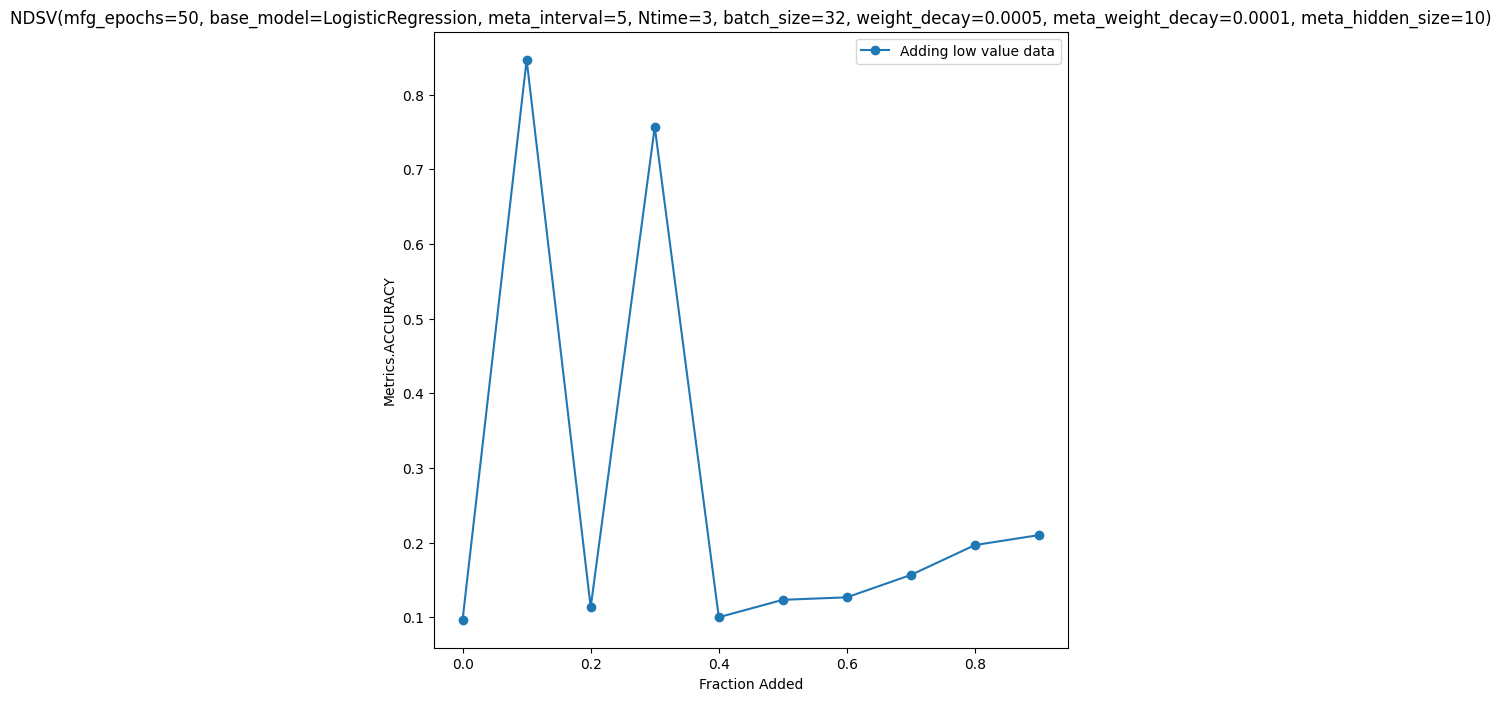

In [27]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(add_low_value, fig, col=2, percnet=percent, save_output=True)